Sift Feature Detection


In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())

In [2]:
from random import randrange
import matplotlib.pyplot as plt
import cv2
figsize = (10,10)
from skimage import io
import numpy as np

(<Axes: title={'center': 'Right'}>,
 Text(0.5, 1.0, 'Right'))

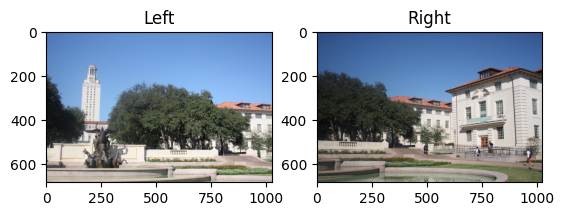

In [3]:
rgb_l = cv2.cvtColor(cv2.imread("left.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)
#plt.imshow(rgb_r)
plt.subplot(1,2,1),plt.imshow(rgb_l), plt.title('Left')
plt.subplot(1,2,2),plt.imshow(rgb_r),plt.title('Right')

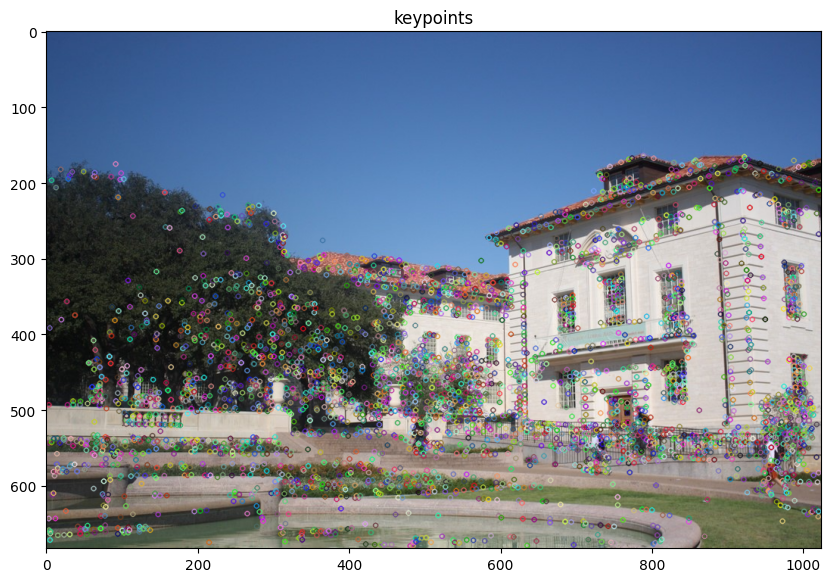

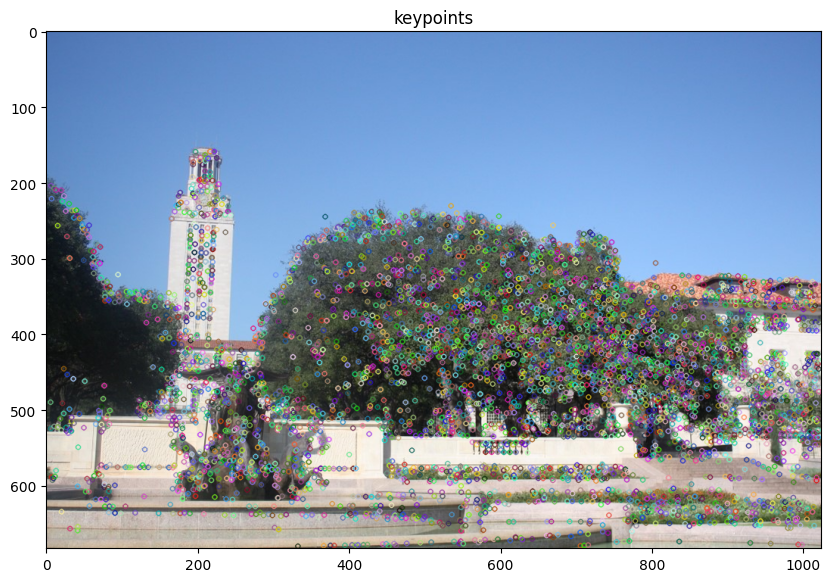

In [4]:
# use orb if sift is not installed
feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(rgb_r, kp_r, None) #flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()
test = cv2.drawKeypoints(rgb_l, kp_l, None)#, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()

Text(0.5, 1.0, 'keypoints matches')

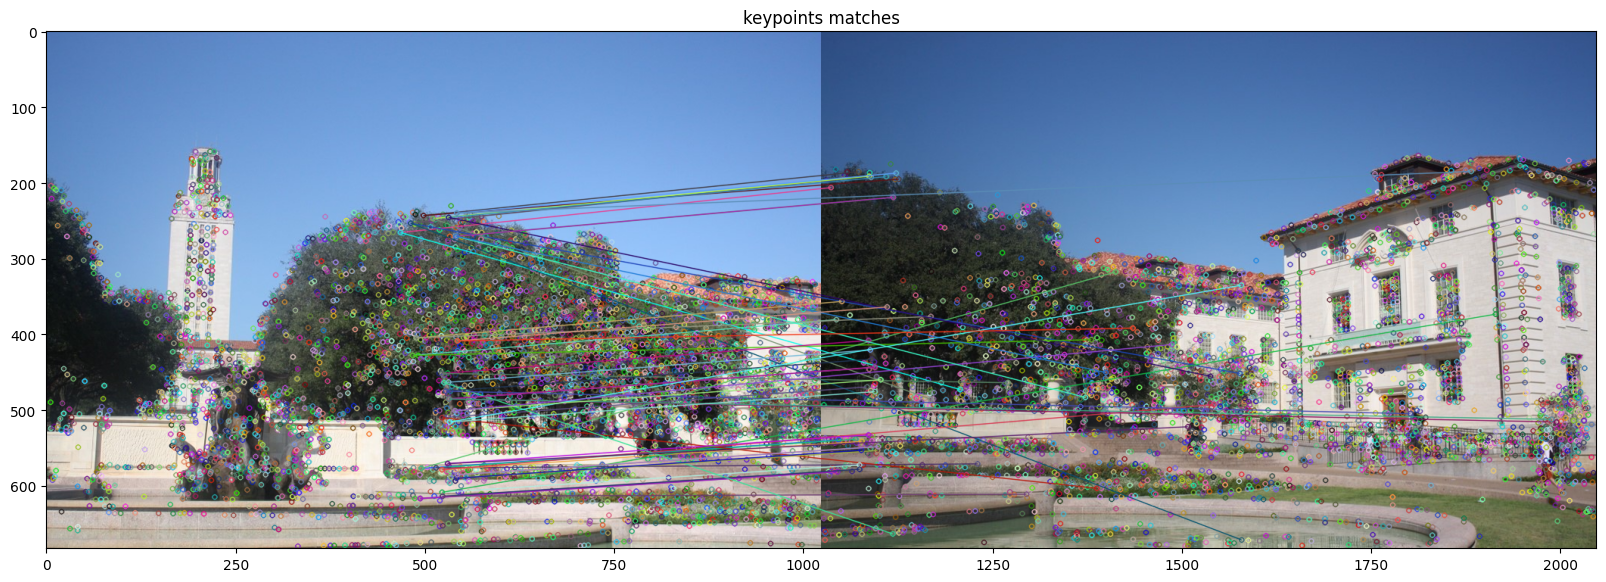

In [5]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_match[0:30], None)# flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")